# Advent of Code - 2025 - Day 9 - Problem 2

https://adventofcode.com/2025/day/9

## Load Source Data

Load source data into `DATA`.

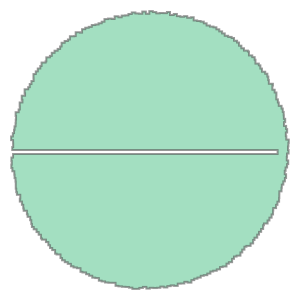

In [6]:
from shapely import Point, Polygon

# Read and parse the input data as shapely Points.
with open("data/day9.txt") as f:
    DATA: list[Point] = [
        Point(int(elements[0]), int(elements[1]))
        for line in f
        if (elements := line.strip().split(","))
    ]

DATA_POLYGON = Polygon(DATA + [DATA[0]])

DATA_POLYGON

## Search for largest rectangle

Adds a connection to a connection set.

In [7]:
from numpy import float64
from numpy.typing import NDArray
from shapely import Polygon, area, bounds, contains # type: ignore

max_size: float64 = float64(0)
max_bounds: NDArray[float64] | None = None
for p1 in DATA:
    for p2 in DATA:
        p_min = Point(min(p1.x, p2.x), min(p1.y, p2.y))
        p_max = Point(max(p1.x, p2.x), max(p1.y, p2.y))
        rectangle = Polygon(
            [
                (p_min.x, p_min.y),
                (p_max.x, p_min.y),
                (p_max.x, p_max.y),
                (p_min.x, p_max.y),
                (p_min.x, p_min.y),
            ]
        )
        if contains(DATA_POLYGON, rectangle):
            new_size = area(rectangle)
            if new_size > max_size:
                max_size = new_size
                max_bounds = bounds(rectangle)

if max_bounds is not None:
    max_area = (max_bounds[2] - max_bounds[0] + 1) * (max_bounds[3] - max_bounds[1] + 1)
    print(f"max_area = {int(max_area)}")

max_area = 1552139370
